In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

file_path = r'C:\Users\samle\source\repos\prosthetic_claw_sim\emg_data\output.csv'

In [12]:
def load_data(file_path):
    if not file_path.endswith('.csv'):
        raise ValueError("The file must be a CSV file.")
    else:
        df = pd.read_csv(file_path)

    return df

def validate_data(df):
    if df.isnull().values.any():
        raise ValueError("Data contains null values.")
    if not all(df.dtypes == 'float64'):
        raise ValueError("All columns must be of float type.")
    if df.shape[1] != 4:
        raise ValueError("Data must contain exactly 4 columns.")
    required_columns = {'time', 'emg', 'left', 'right'}
    if not required_columns.issubset(df.columns):
        raise ValueError("DataFrame must contain columns: time, emg, left, right.")
    
# Plotting Left and Right Claw Angles over time
def visualise_data(df):
    fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
    fig.subplots_adjust(hspace=0.4)

    axs[0].plot(df['time'], np.degrees(df['left']), color='blue')
    axs[0].set_title('Left Claw Angle')
    axs[0].set_ylabel('Angle (degrees)')
    axs[0].grid(True)

    axs[1].plot(df['time'], np.degrees(df['right']), color='red')
    axs[1].set_title('Right Claw Angle')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Angle (degrees)')
    axs[1].grid(True)

    plt.show()

# Setup the figure and lines
def create_figure():
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    ax.grid(True)

    left_claw, = ax.plot([], [], 'b-', linewidth=4, label="Left Claw")
    right_claw, = ax.plot([], [], 'r-', linewidth=4, label="Right Claw")
    
    base = (0, 0)
    claw_length = 1.0

    ax.legend()

    return fig, ax, left_claw, right_claw, base, claw_length

# Initialization function
def init(left_claw, right_claw):
    left_claw.set_data([], [])
    right_claw.set_data([], [])
    return left_claw, right_claw

# Update function
def update(frame, df, left_claw, right_claw, base, claw_length):
    base_x, base_y = base
    left_angle = df['left'].iloc[frame]
    right_angle = df['right'].iloc[frame]

    left_end_x = base_x + claw_length * np.cos(left_angle)
    left_end_y = base_y + claw_length * np.sin(left_angle)

    right_end_x = base_x + claw_length * np.cos(right_angle)
    right_end_y = base_y + claw_length * np.sin(right_angle)

    left_claw.set_data([base_x, left_end_x], [base_y, left_end_y])
    right_claw.set_data([base_x, right_end_x], [base_y, right_end_y])

    return left_claw, right_claw

# Running the animation
def run_animation(df):
    fig, ax, left_claw, right_claw, base, claw_length = create_figure()

    ani = animation.FuncAnimation(
        fig,
        update,
        frames=len(df),
        fargs=(df, left_claw, right_claw, base, claw_length),
        init_func=lambda: init(left_claw, right_claw),
        blit=True,
        interval=20
    )
    
    plt.show()



TypeError: 'NoneType' object is not subscriptable

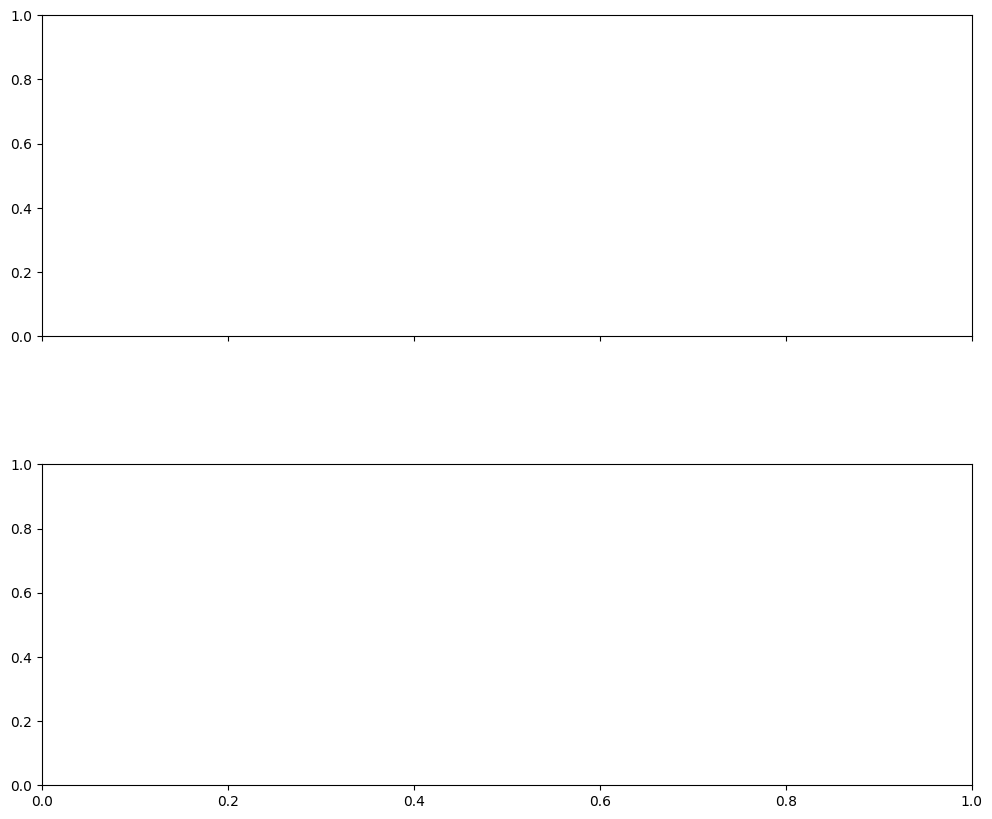

In [13]:
if __name__ == "__main__":
    df = load_data(file_path)
    df = validate_data(df)
    visualise_data(df)
    run_animation(df)